# Comparison between numerical stability curves

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

import numpy as np
import pickle

### Load numerical stability curves

In [2]:
methods = ['Cholesky', 'CGLS', 'TOB20', 
           'deconv_unstable', 'deconv_suboptimal', 'deconv_optimal', 'deconv_overshoot']

In [3]:
stability_curves = []

In [4]:
for method in methods:
    with open(method+'_stability.pickle', 'rb') as f:
        stability_curves.append(pickle.load(f))

In [5]:
names = ['$\mathtt{Cholesky}$',
         '$\mathtt{CGLS}$',
         '$\mathtt{TOB20}$',
         '$\mathtt{deconv}$ (unstable)',
         '$\mathtt{deconv}$ (suboptimal)',
         '$\mathtt{deconv}$ (optimal)',
         '$\mathtt{deconv}$ (overshoot)']

colors = ['black',
          'red',
          'purple',
          'lightgrey', 
          'darkgrey', 
          'magenta',
          'dimgrey']

linestyles = ['-', '-', '-', ':', ':', '-', ':']

markers = ['o', 
           'x',
           '^',
           'D',
           'D',
           'D',
           'D']

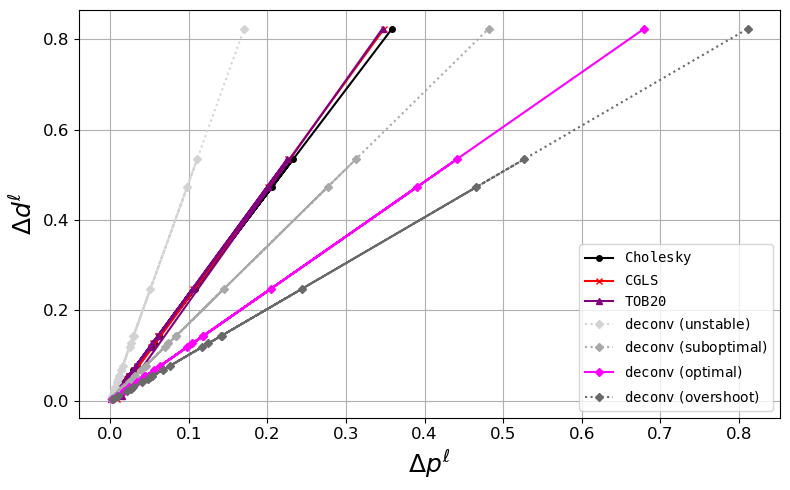

In [6]:
fig, ax = plt.subplots(figsize=(8,5))

for (color, linestyle, marker, method, name) in zip(colors, linestyles, markers, methods, names):
    ### Open the stability curve
    file_name = method+'_stability.pickle'
    with open(file_name, 'rb') as f:
        numerical_stability_curve = pickle.load(f)

    ax.plot(
        numerical_stability_curve['model'], 
        numerical_stability_curve['data'], 
        linestyle=linestyle, color=color, marker=marker, alpha=1, markersize=4, label=name)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('$\Delta p^{\ell}$', fontsize=18)
ax.set_ylabel('$\Delta d^{\ell}$', fontsize=18)
ax.grid(True)
ax.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.savefig('../manuscript/Fig/stability-comparison.png', dpi= 300)
plt.show()